1) Set up a Jupyter notebook with visualization libraries, and import the cleaned data set you chose in the previous Exercise.
 - Use the questions you defined in the previous task to pick out variables from your data set suitable for your exploratory visual analysis.
 - For instance, discard “ID,” “date,” and “index” variables.
2) Create a correlation matrix heatmap (colored).
 - Discuss what the coefficients in the plot mean in terms of the relationships between the variables.
3) Create a scatterplot (or plots) for the variables with the strongest correlations and examine the nature of their relationships.
 - Discuss the output in a markdown cell.
4) Create a pair plot of the entire data set.
 - Comment on the distribution of the variables and mark variables you’d like to explore further with an explanation of why.
5) Create a categorical plot and interpret the results.
6) Revisit the questions you generated in the previous task and write answers to those you can based on the exploration you’ve conducted so far. Add any new questions that may have arisen based on the early findings in your visual exploration.
7) Define any hypotheses that you can at this point. You’ll be testing these later on.
8) Submit your Jupyter notebook with your markdown comments to your tutor for review.

In [1]:
### Importing Libraries, incl. Data Viz
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import matplotlib

In [2]:
matplotlib.__version__

'3.7.1'

In [3]:
### Create datapath to Final Project Folder - Data
datapath = r'/Users/gabrielconfrey/Desktop/Data Analysis/Career Foundry/Achievement 6/Final Project/Data'

In [4]:
### Importing df from last exercise
df = pd.read_pickle(os.path.join(datapath, '2. Cleaned', 'homedataclean.pkl'))

### Checking dataframe is as expected

In [5]:
df.head()

,Town,Year,Town/Year,Value,Type,County,Population,2011 % Homeowners,2019 Per Capita Income,2019 # Households,2019 Median Household Income,2019 Median Family Income
0,Abington,2021,Abington 2021,"$500,000.00",house_price,Plymouth,NaN,73.0,"$34,567",5798.0,"$78,395","$92,452"
1,Abington,2020,Abington 2020,"$432,750.00",house_price,Plymouth,NaN,73.0,"$34,567",5798.0,"$78,395","$92,452"
2,Abington,2019,Abington 2019,"$385,000.00",house_price,Plymouth,16668.0,73.0,"$34,567",5798.0,"$78,395","$92,452"
3,Abington,2018,Abington 2018,"$395,000.00",house_price,Plymouth,16532.0,73.0,"$34,567",5798.0,"$78,395","$92,452"
4,Abington,2016,Abington 2016,"$345,000.00",house_price,Plymouth,16335.0,73.0,"$34,567",5798.0,"$78,395","$92,452"


### Forgot to add inplace = True when deleting Town/Year column, so need to redo

In [6]:
df['Type'].value_counts()

Type
Br2_rent       4823
Br3_rent       4823
Br4_rent       4823
house_price     928
Name: count, dtype: int64

In [7]:
df.drop(columns = ['Town/Year'], inplace=True)

In [8]:
df.head()

,Town,Year,Value,Type,County,Population,2011 % Homeowners,2019 Per Capita Income,2019 # Households,2019 Median Household Income,2019 Median Family Income
0,Abington,2021,"$500,000.00",house_price,Plymouth,NaN,73.0,"$34,567",5798.0,"$78,395","$92,452"
1,Abington,2020,"$432,750.00",house_price,Plymouth,NaN,73.0,"$34,567",5798.0,"$78,395","$92,452"
2,Abington,2019,"$385,000.00",house_price,Plymouth,16668.0,73.0,"$34,567",5798.0,"$78,395","$92,452"
3,Abington,2018,"$395,000.00",house_price,Plymouth,16532.0,73.0,"$34,567",5798.0,"$78,395","$92,452"
4,Abington,2016,"$345,000.00",house_price,Plymouth,16335.0,73.0,"$34,567",5798.0,"$78,395","$92,452"


## Re-running Cleaning Checks
 - df.shape
 - df.columns (renaming if necessary)
 - df.dtypes
 - df.head()
 - df.isnull().sum()
 - df_dups = df[df.duplicated()]
     - df_dups.shape
 - for col in df.columns.tolist():
     weird = (df[[col]].applymap(type) != df[[col]].iloc(0).apply(type)).any(axis = 1)
     if len(df[weird]) >0:
         print (col)

In [9]:
df.shape

(15397, 11)

In [10]:
df.columns

Index(['Town', 'Year', 'Value', 'Type', 'County', 'Population',
       '2011 % Homeowners', '2019 Per Capita Income', '2019 # Households',
       '2019 Median Household Income', '2019 Median Family Income'],
      dtype='object')

In [11]:
df.dtypes

Town                             object
Year                              int64
Value                            object
Type                             object
County                           object
Population                      float64
2011 % Homeowners               float64
2019 Per Capita Income           object
2019 # Households               float64
2019 Median Household Income     object
2019 Median Family Income        object
dtype: object

### Data types need to be corrected

In [12]:
df.head()

,Town,Year,Value,Type,County,Population,2011 % Homeowners,2019 Per Capita Income,2019 # Households,2019 Median Household Income,2019 Median Family Income
0,Abington,2021,"$500,000.00",house_price,Plymouth,NaN,73.0,"$34,567",5798.0,"$78,395","$92,452"
1,Abington,2020,"$432,750.00",house_price,Plymouth,NaN,73.0,"$34,567",5798.0,"$78,395","$92,452"
2,Abington,2019,"$385,000.00",house_price,Plymouth,16668.0,73.0,"$34,567",5798.0,"$78,395","$92,452"
3,Abington,2018,"$395,000.00",house_price,Plymouth,16532.0,73.0,"$34,567",5798.0,"$78,395","$92,452"
4,Abington,2016,"$345,000.00",house_price,Plymouth,16335.0,73.0,"$34,567",5798.0,"$78,395","$92,452"


In [13]:
df.isnull().sum()

Town                                0
Year                                0
Value                               0
Type                                0
County                              0
Population                      14736
2011 % Homeowners                   0
2019 Per Capita Income              0
2019 # Households                   0
2019 Median Household Income        0
2019 Median Family Income           0
dtype: int64

### Some data is missing, but only in the population column, which is acceptable. While not necessary for my analysis, including population, esp. in correlations, could be productive.

In [14]:
df_dups = df[df.duplicated()]

In [15]:
df_dups.shape

(0, 11)

In [16]:
for col in df.columns.tolist():
      weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
      if len (df[weird]) > 0:
        print (col)

### After running checks, the only thing left to be fixed is the data types.

In [17]:
df.head(1)

,Town,Year,Value,Type,County,Population,2011 % Homeowners,2019 Per Capita Income,2019 # Households,2019 Median Household Income,2019 Median Family Income
0,Abington,2021,"$500,000.00",house_price,Plymouth,NaN,73.0,"$34,567",5798.0,"$78,395","$92,452"


### Town, object
 - Year,int64
 - Value, object
 - Type, object
 - County, object
 - Population, float64
 - 2011 % Homeowners, float64
 - 2019 Per Capita Income, object
 - 2019 # Households, float64
 - 2019 Median Household Income, object
 - 2019 Median Family Income, object

### To fix quickly, I'll export as csv. Reformat in Excel and import again.

In [18]:
### Exporting dataset as csv for reclean in Excel
df.to_csv(os.path.join(datapath, '2. Cleaned', 'toreformat.csv'))

### Import recleaned data and check types

In [24]:
df = pd.read_csv(os.path.join(datapath, '2. Cleaned', 'reformatted.csv'))

In [25]:
df.head()

,Unnamed: 0,Town,Year,Value,Type,County,Population,2011 % Homeowners,2019 Per Capita Income,2019 # Households,2019 Median Household Income,2019 Median Family Income
0,0,Abington,2021,500000.0,house_price,Plymouth,NaN,73,34567.0,5798,78395.0,92452.0
1,1,Abington,2020,432750.0,house_price,Plymouth,NaN,73,34567.0,5798,78395.0,92452.0
2,2,Abington,2019,385000.0,house_price,Plymouth,16668.0,73,34567.0,5798,78395.0,92452.0
3,3,Abington,2018,395000.0,house_price,Plymouth,16532.0,73,34567.0,5798,78395.0,92452.0
4,4,Abington,2016,345000.0,house_price,Plymouth,16335.0,73,34567.0,5798,78395.0,92452.0


In [26]:
df.dtypes

Unnamed: 0                        int64
Town                             object
Year                              int64
Value                           float64
Type                             object
County                           object
Population                      float64
2011 % Homeowners                 int64
2019 Per Capita Income          float64
2019 # Households                 int64
2019 Median Household Income    float64
2019 Median Family Income       float64
dtype: object

### All data is fixed, cleaned and ready for correlations

In [27]:
# Create a correlation matrix using pandas; have to specify list of int64 columns though!

df[['Value','Population','2011 % Homeowners','2019 Per Capita Income','2019 # Households','2019 Median Household Income','2019 Median Family Income']].corr()

,Value,Population,2011 % Homeowners,2019 Per Capita Income,2019 # Households,2019 Median Household Income,2019 Median Family Income
Value,1.000000,-0.001665,-0.015360,0.205619,0.076316,0.192014,0.193535
Population,-0.001665,1.000000,-0.477496,-0.156003,0.960970,-0.236874,-0.240017
2011 % Homeowners,-0.015360,-0.477496,1.000000,0.285766,-0.457827,0.406050,0.361215
2019 Per Capita Income,0.205619,-0.156003,0.285766,1.000000,0.069024,0.886097,0.905747
2019 # Households,0.076316,0.960970,-0.457827,0.069024,1.000000,-0.017023,-0.009902
2019 Median Household Income,0.192014,-0.236874,0.406050,0.886097,-0.017023,1.000000,0.945720
2019 Median Family Income,0.193535,-0.240017,0.361215,0.905747,-0.009902,0.945720,1.000000


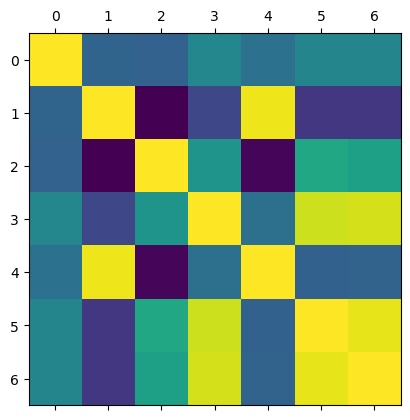

In [28]:
# Create a correlation heatmap using matplotlib

plt.matshow(df[['Value','Population','2011 % Homeowners','2019 Per Capita Income','2019 # Households','2019 Median Household Income','2019 Median Family Income']].corr())
plt.show()

In [29]:
### Use Seaborn instead...subsetting with appropriate columns

sub = df[['Value','Population','2011 % Homeowners','2019 Per Capita Income','2019 # Households','2019 Median Household Income','2019 Median Family Income']]

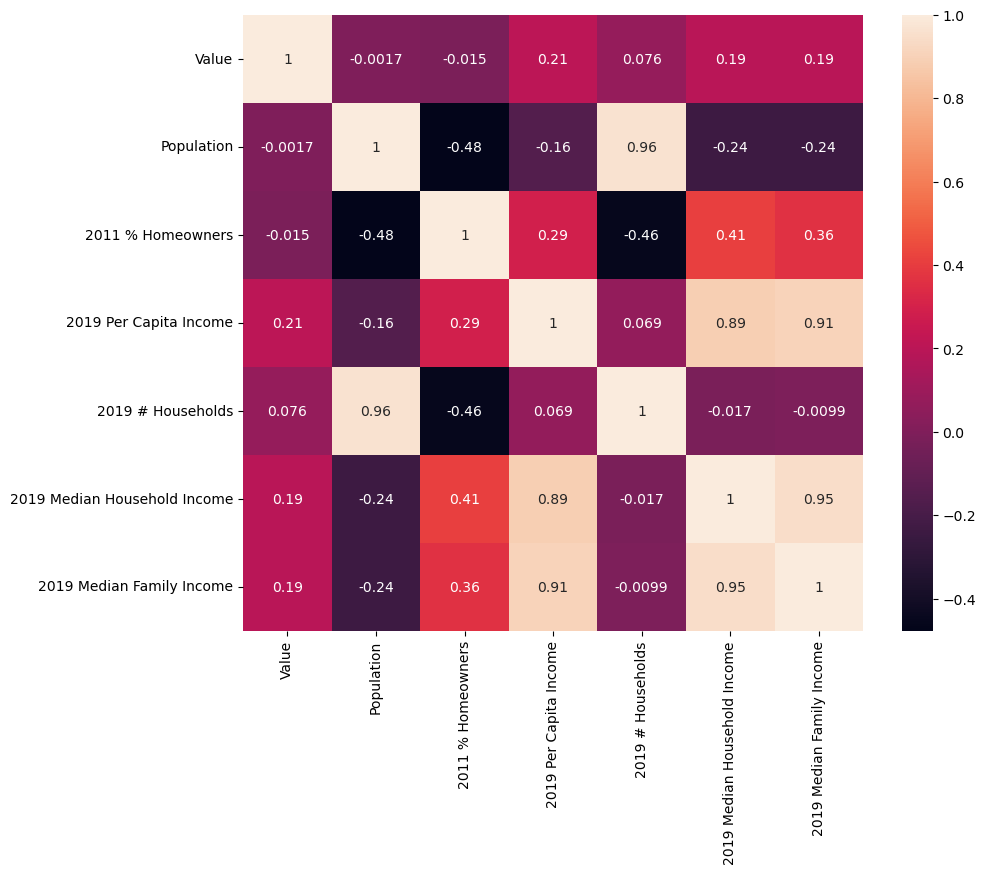

In [30]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,8))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

In [34]:
plt.savefig("correlation2.png")

<Figure size 640x480 with 0 Axes>

### Well, that's cool!
### 2) Create a correlation matrix heatmap (colored).
 - Discuss what the coefficients in the plot mean in terms of the relationships between the variables.

#### I'm seeing obvious correlations between financial variables such as Per Capita Income, Household Income and Family Income. Obviously when one of these is high, it's likely attributable to a single income earner. It's possible that either Household Income or Family Income column could be deleted, as they are proxies for one another.

#### Also really interesting moderate correlations between % Homeownership and Household/Family Income. This suggests that as Households/Families earn more, they buy houses, or that Houseowners have higher income (obvious).

#### The relationship between Population and Homeownership makes sense as single family dwellings are less population dense. Essentially the same relationship as # of Households and % Homeownership.

### 3) Create a scatterplot (or plots) for the variables with the strongest correlations and examine the nature of their relationships. Discuss the output in a markdown cell.

#### Strongest positive correlations are 
 - Household/Family Income (.95)
 - Per Capita/Family Income (.91)
 - Per Capita/Household Income (.89)
 
 #### The above three are essentially proxies for one another. May consider removing 2/3 to lighten the dataset.
 
 - % Homeownership/Household Income (.41)
 - % Homeownership/Family Income (.36)
 
#### Strongest negative correlations are 
 - Population/% Homeownership (-.48)
 - #Households/% Homeownership (-.46)

In [35]:
df.columns

Index(['Unnamed: 0', 'Town', 'Year', 'Value', 'Type', 'County', 'Population',
       '2011 % Homeowners', '2019 Per Capita Income', '2019 # Households',
       '2019 Median Household Income', '2019 Median Family Income'],
      dtype='object')

### Positive Correlations Firsts

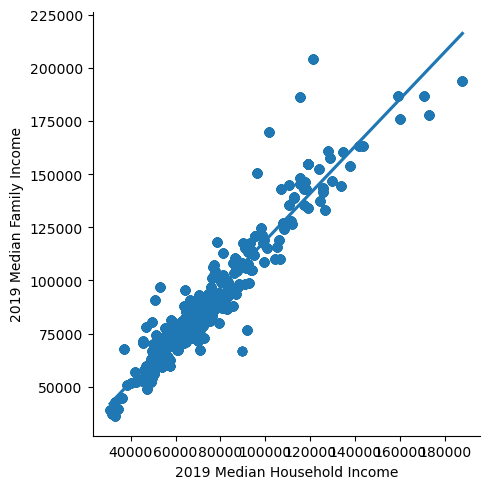

In [36]:
# Create a scatterplot for Household and Family income relationship

sns.lmplot(x = '2019 Median Household Income', y = '2019 Median Family Income', data = df)

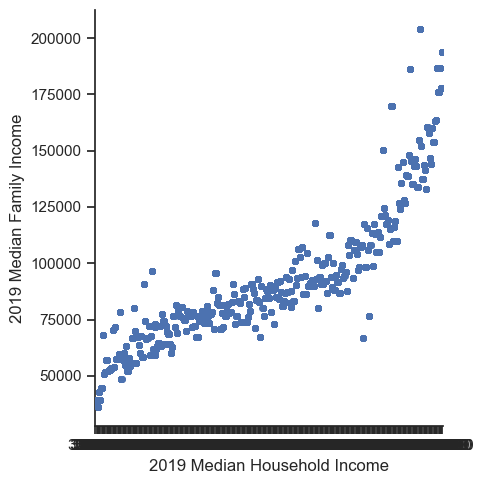

In [37]:
# Cat Plot looking at Household and Family income relationship across Types.

sns.set(style="ticks")
g = sns.catplot(x="2019 Median Household Income", y="2019 Median Family Income", data=df)

### The data follows an exponential S curve, as Median Household Income increases, Median Family Income increases. One of these data points can be omitted from analysis, or deleted entirely, as the stats are close proxies for one another.

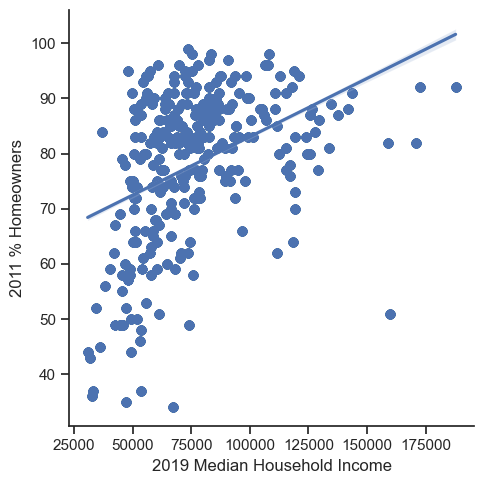

In [38]:
# Create a scatterplot for % Homeownership and Household income relationship

sns.lmplot(x = '2019 Median Household Income', y = '2011 % Homeowners', data = df)

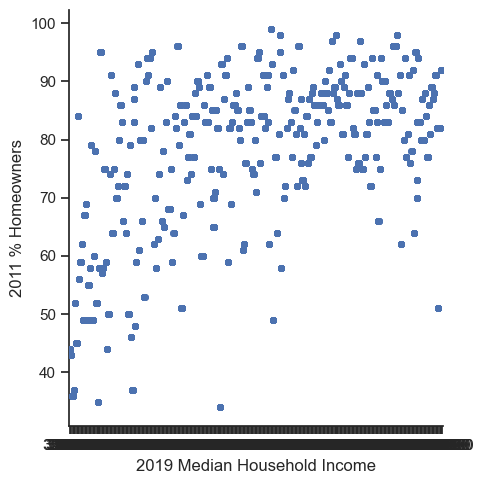

In [39]:
# Cat Plot looking at % Homeownership and Household income relationship.

sns.set(style="ticks")
g = sns.catplot(x="2019 Median Household Income", y="2011 % Homeowners", data=df)

### As household income increases, there is a slight increase in % of homeowners. This makes sense, as homeowners need a higher income to afford the home in the first place. As seen in the below chart too, as population increases, % homeownerships decreases, lending itself to the idea that single home neighborhoods are less dense, and likely further from amenities, which would require personal vehicles (another big expense) to access.

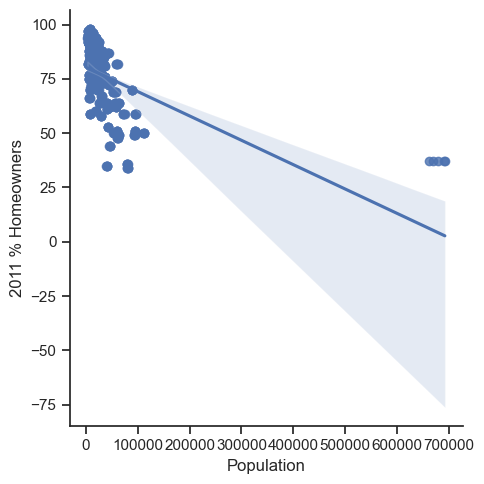

In [40]:
# Create a scatterplot for % Homeownership and Population income relationship

sns.lmplot(x = 'Population', y = '2011 % Homeowners', data = df)

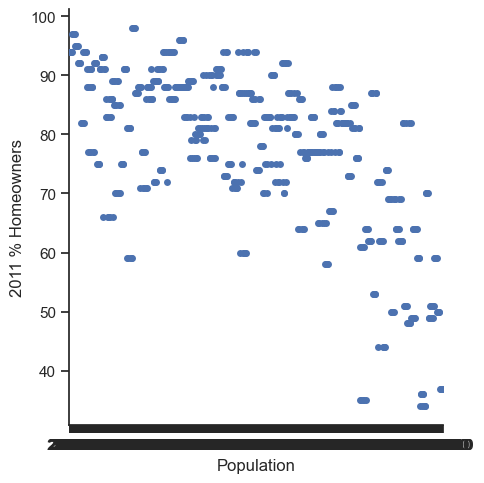

In [41]:
# Cat Plot looking at % Homeownership and Population relationship.

sns.set(style="ticks")
g = sns.catplot(x="Population", y="2011 % Homeowners", data=df)

### As population increases, % homeowners decreases. This shows that single family home neighborhoods are less dense, more exclusive, and likely further from non-residential zoned areas of a city/town.

## Create a categorical plot and interpret the results.
 - Revisit the questions you generated in the previous task and write answers to those you can based on the exploration you’ve conducted so far. Add any new questions that may have arisen based on the early findings in your visual exploration.
 - Define any hypotheses that you can at this point. You’ll be testing these later on.
 - Submit your Jupyter notebook with your markdown comments to your tutor for review.

#### See above categorical plots alongside scatterplots

## New questions:
1) How does the relationship of population to homeownership change over time? How about Type/Population and homeownership? Can this tell me which neighborhoods are growing single family communities vs growing multi purpose communities?
 - I think certain Towns will show rental OR home correlations to population, but not both, which may indicate which towns are more single family home-oriented.
2) Does Population correlate to Value?
 - My hypothesis is that as population increases for rental Types, Value will decrease, but as population increases for home Type, Value will increase.

In [42]:
### BONUS: Pair Plot for fun
#### Keep only the variables to use in the pair plot:
#### 'Value','Population','2011 % Homeowners','2019 # Households','2019 Median Household Income'

sub_2 = sub[['Value','Population','2011 % Homeowners','2019 # Households','2019 Median Household Income']]

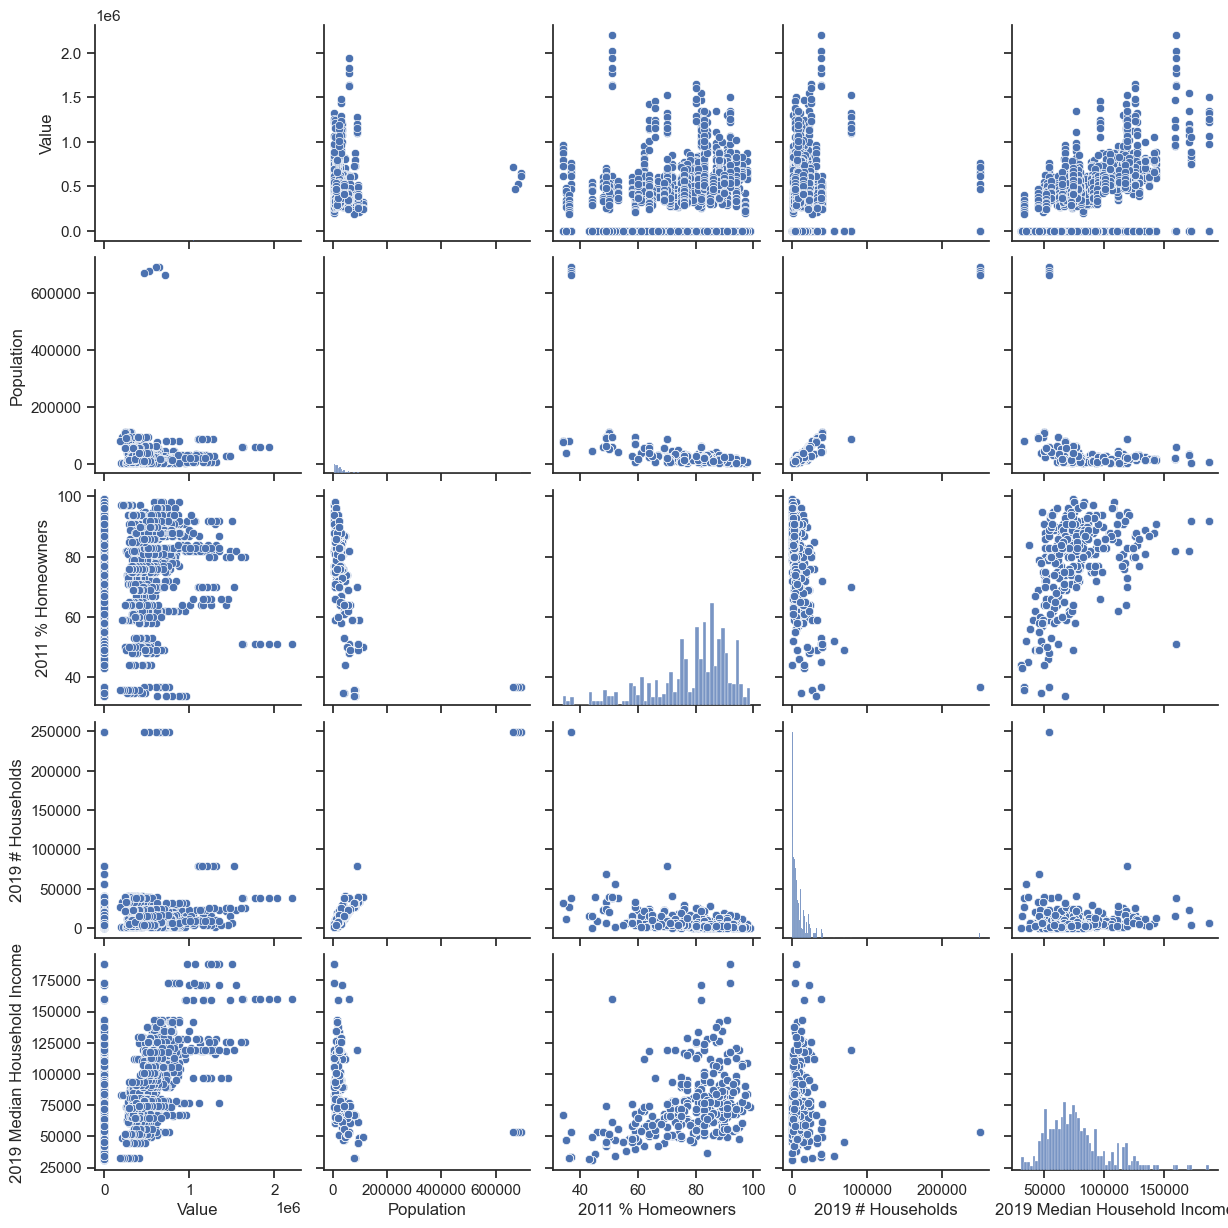

In [43]:
# Create a pair plot 

g = sns.pairplot(sub_2)